In [2]:
pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
# importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#importing and reading the dataset

stroke_df= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
stroke_df_row_count, stroke_df_column_count=stroke_df.shape
print('Total rows:', stroke_df_row_count)
print('Total columns:', stroke_df_column_count)

Total rows: 5110
Total columns: 12


In [4]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
stroke_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
stroke_df.corr(method="pearson")

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [7]:
#check missing values

stroke_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
miss_val = stroke_df.isnull().sum()/len(stroke_df)*100
print(miss_val)
print("Missing values in variable bmi\t: {:.2f}%".format(miss_val['bmi']))
print("Missing values in variable heart_disease: {:.2f}%".format(miss_val['heart_disease']))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
Missing values in variable bmi	: 3.93%
Missing values in variable heart_disease: 0.00%


In [9]:
print ("Unique values:\n",stroke_df.nunique())

Unique values:
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


In [10]:
#check datatypes

stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
# total Number of Male and Female in the Data
total_males=(stroke_df["gender"]=="Male").sum()
total_female=(stroke_df["gender"]=="Female").sum()
print("total Males:",total_males)
print("total Females:",total_female)

total Males: 2115
total Females: 2994


In [12]:
# finding all the Female who have stroke
no_female_stroke=(stroke_df[(stroke_df['gender']=="Female") & (stroke_df['stroke']==1)])
no_female_stroke = no_female_stroke.count()["id"]
print("total feales with Stroke:",no_female_stroke)

total feales with Stroke: 141


In [13]:
# finding all the Male who have stroke
no_male_stroke=(stroke_df[(stroke_df['gender']=="Male") & (stroke_df['stroke']==1)])
no_male_stroke = no_male_stroke.count()["id"]
print("total males with Stroke:",no_male_stroke)

total males with Stroke: 108


In [15]:

total_stroke = {no_male_stroke+no_female_stroke}
print(f"Total NO have Stroke:\t  {no_male_stroke+no_female_stroke}")

Total NO have Stroke:	  249


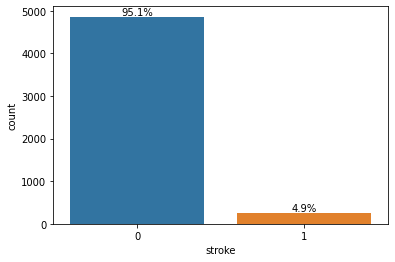

In [16]:
#"A picture is worth a thousand words"
ncount = len(stroke_df['stroke'])
ax = sns.countplot(x=stroke_df['stroke'])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.savefig('stroke_count.png')

<AxesSubplot:xlabel='stroke', ylabel='count'>

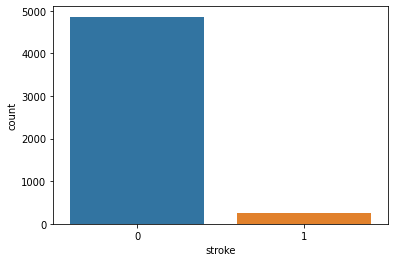

In [17]:
sns.countplot(x = 'stroke',data = stroke_df)

In [18]:
# Infant = 0-1 year.
infant=(stroke_df["age"]<=1)
# Toddler = 2-4 yrs.
toddler=stroke_df.loc[(stroke_df['age'] > 1) & (stroke_df['age'] <=4)].count()
# Child = 5-12 yrs.
child=stroke_df.loc[(stroke_df['age'] > 4) & (stroke_df['age'] <=12)].count()
# Teen = 13-19 yrs.
teen=stroke_df.loc[(stroke_df['age'] > 12) & (stroke_df['age'] <=19)].count()
# Adult = 20-39 yrs
adult=stroke_df.loc[(stroke_df['age'] > 19) & (stroke_df['age'] <=39)].count()
# Middle Age Adult = 40-59 yrs
m_adult=stroke_df.loc[(stroke_df['age'] > 39) & (stroke_df['age'] <=59)].count()
# Senior Adult = 60+
senior=stroke_df.loc[(stroke_df['age'] > 59)].count()

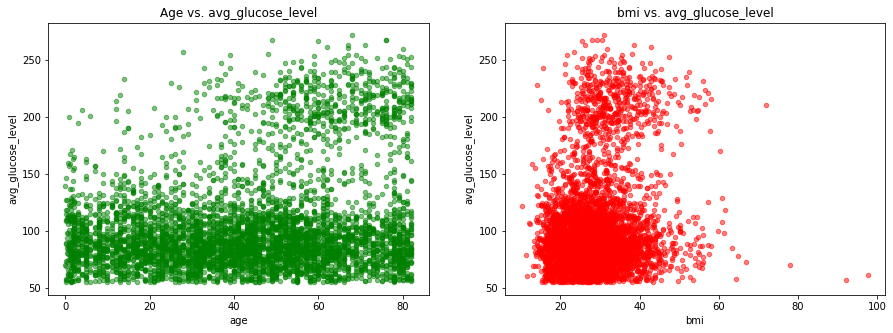

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
stroke_df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
stroke_df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

In [20]:
# Calculating the amount and percentage of female and male patients
# print(stroke_data.gender.value_counts())


total_patients=no_female_stroke+no_male_stroke
female_percent = no_female_stroke * 100 / total_patients
male_percen = no_male_stroke * 100 / total_patients

print(f'Female Patients:\t{no_female_stroke}---   {female_percent}%')
print(f'Male Patients:  \t{no_male_stroke}---   {male_percen}%')

Female Patients:	141---   56.626506024096386%
Male Patients:  	108---   43.373493975903614%


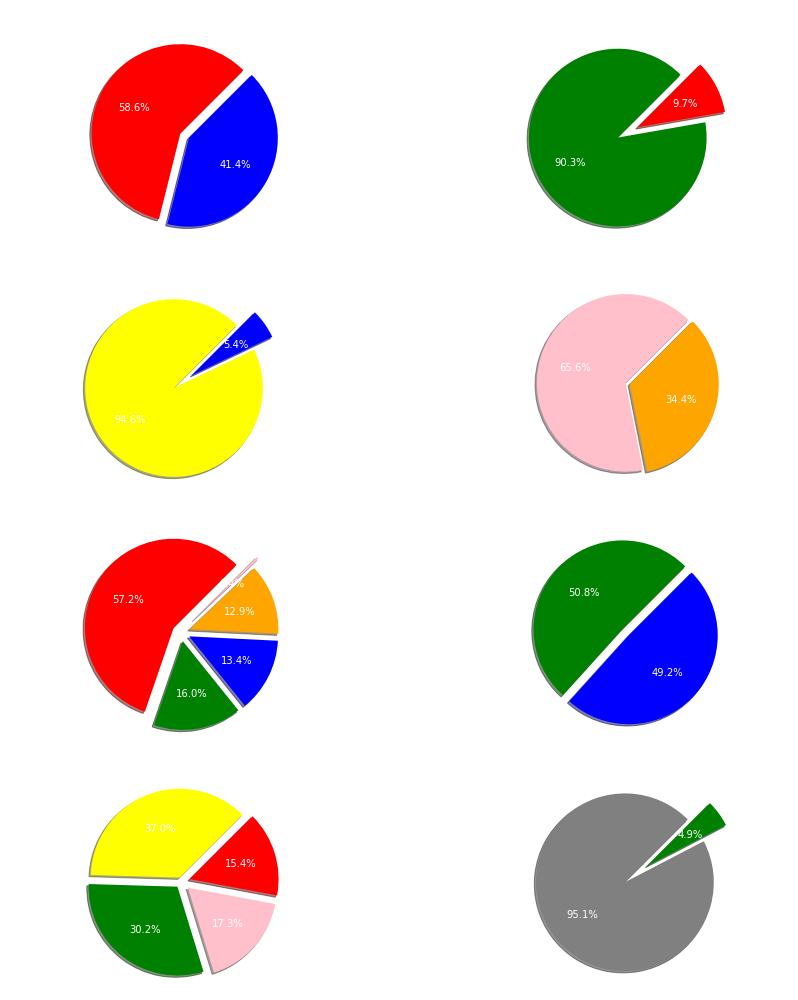

In [21]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = stroke_df['gender'].value_counts().index.tolist()[:2]
values = stroke_df['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['red','blue'],shadow=True, startangle=45,explode=[0.01, 0.1],textprops={'color':"w"})
ax1.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold',color = 'white')

labels = ["No Hypertension", "Hypertension"]
values = stroke_df['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['green','red'],shadow=True,startangle=45,explode=[0.1, 0.15],textprops={'color':"w"})
ax2.set_title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold',color = 'white')

labels = ["No Heart Disease", "Heart Disease"]
values = stroke_df['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['yellow','blue'],shadow=True, startangle=45,explode=[0.1, 0.15],textprops={'color':"w"})
ax3.set_title("Heart disease", fontdict={'fontsize': 12},fontweight ='bold',color = 'white')

labels = ["Married", "Not Married"]
values = stroke_df['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['pink','orange'],shadow=True,startangle=45,explode=[0, 0.05],textprops={'color':"w"})
ax4.set_title("Marriage", fontdict={'fontsize': 12},fontweight ='bold',color = 'white')

labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = stroke_df['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['red','green','blue','orange','pink'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2],textprops={'color':"w"})
ax5.set_title("Work Type", fontdict={'fontsize': 12},fontweight ='bold',color = 'white')

labels = ["Urban", "Rural"]
values = stroke_df['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['green','blue'],shadow=True,startangle=45,explode=[0.05, 0.05],textprops={'color':"w"})
ax6.set_title("Residence Type", fontdict={'fontsize': 12},fontweight ='bold',color = 'white')

labels = ["Never Smoked", "Unknown", "Smoked", "Smokes"]
values = stroke_df['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1],colors=['yellow','green','pink','red'],textprops={'color':"w"})
ax7.set_title("Smoking Status", fontdict={'fontsize': 12},fontweight ='bold',color = 'white')

labels = ["No Stroke", "Stroke"]
values = stroke_df['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3],colors=['grey','green'],textprops={'color':"w"})
ax8.set_title("Stroke", fontdict={'fontsize': 12},fontweight ='bold',color = 'white')

plt.tight_layout()
plt.show()


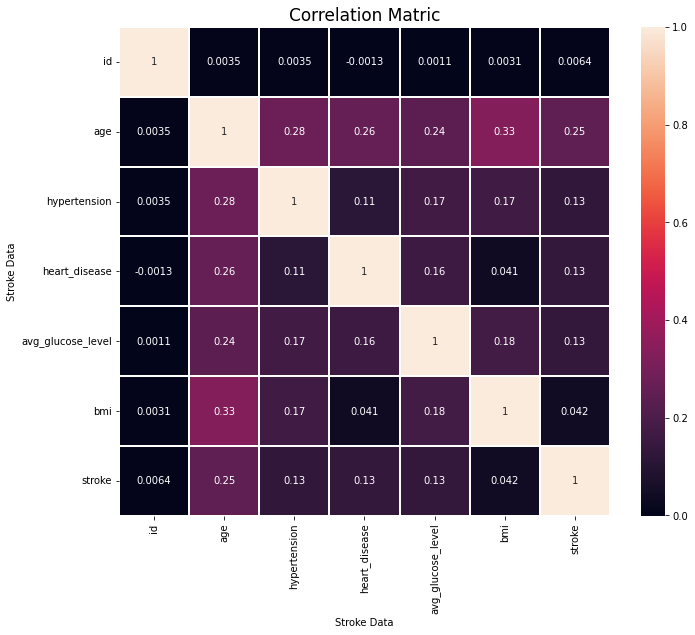

In [22]:
# Visualisation of the corralation table before the Numeric conversion
correlation = stroke_df.corr()
plt.figure(figsize=(11,9))
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matric', size=17)
plt.xlabel('Stroke Data')
plt.ylabel('Stroke Data')
plt.show()

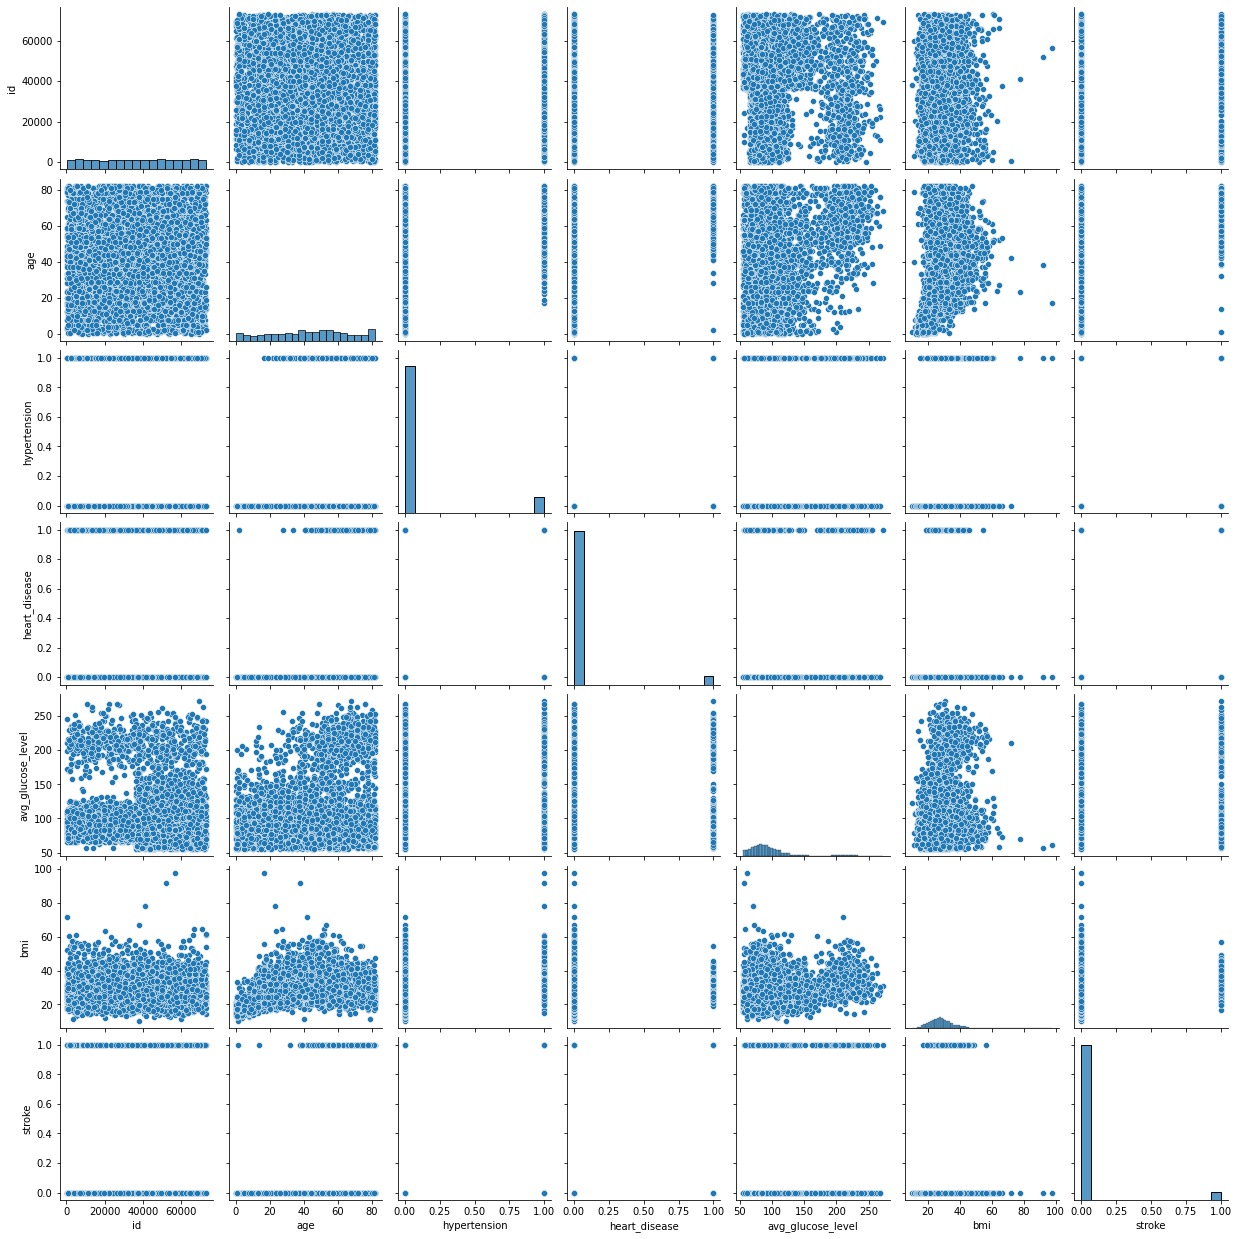

In [23]:
sns.pairplot(stroke_df)

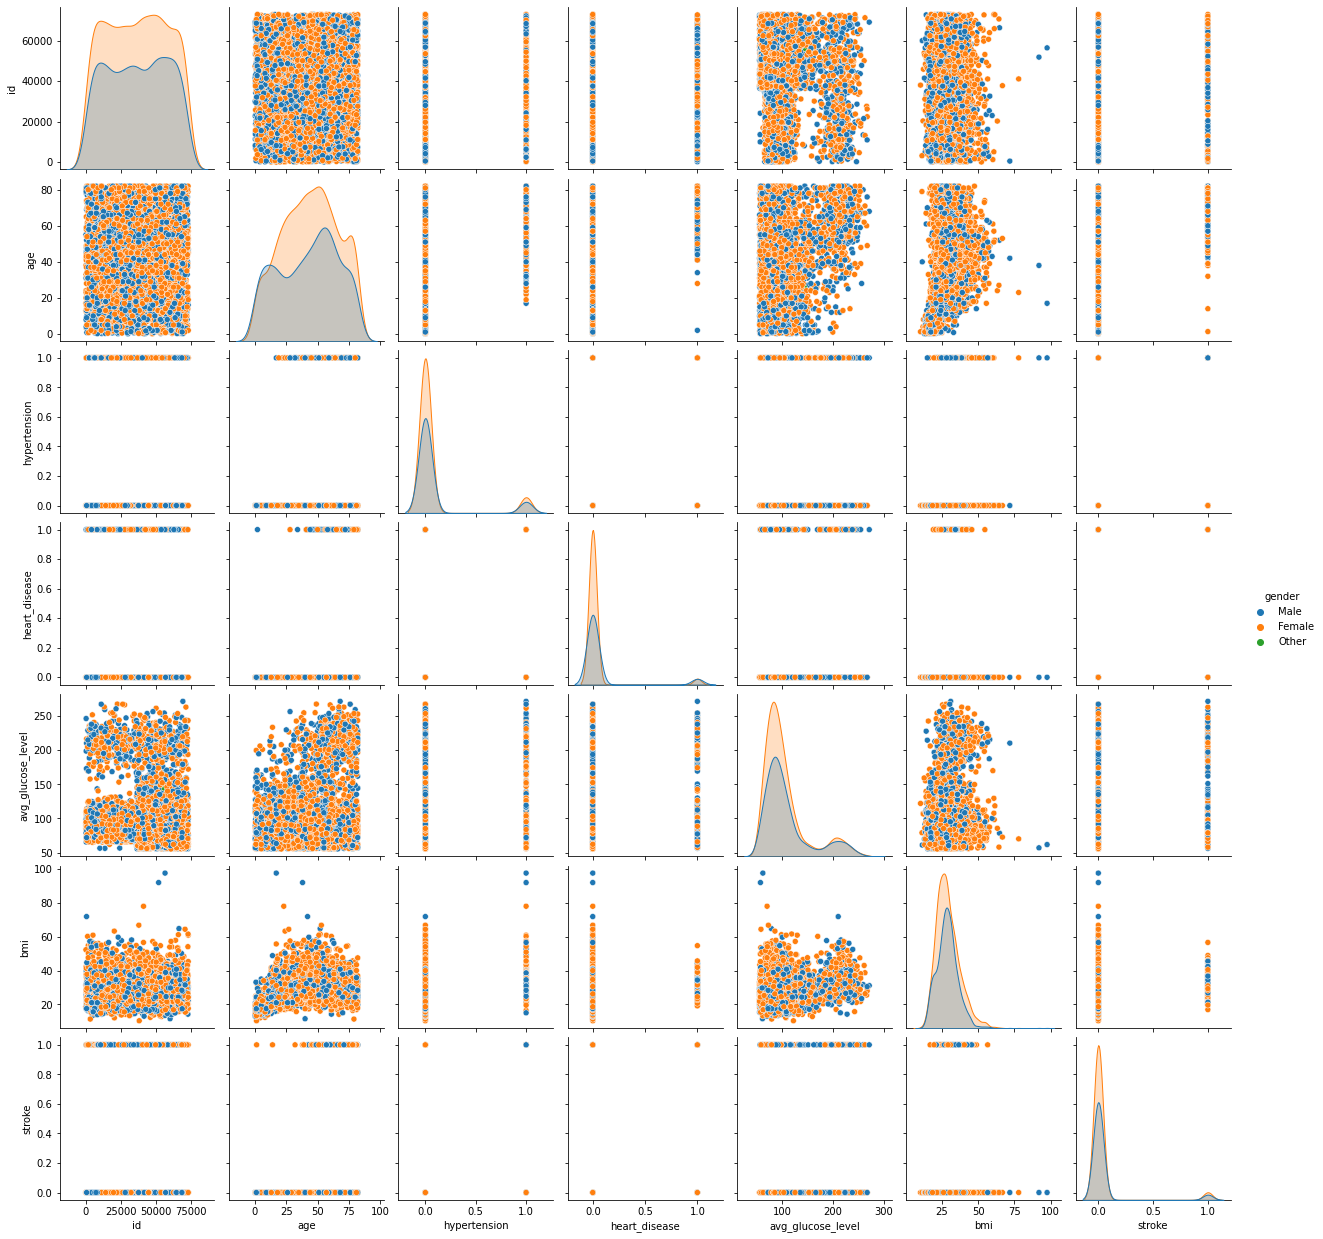

In [24]:
sns.pairplot(stroke_df, hue="gender")

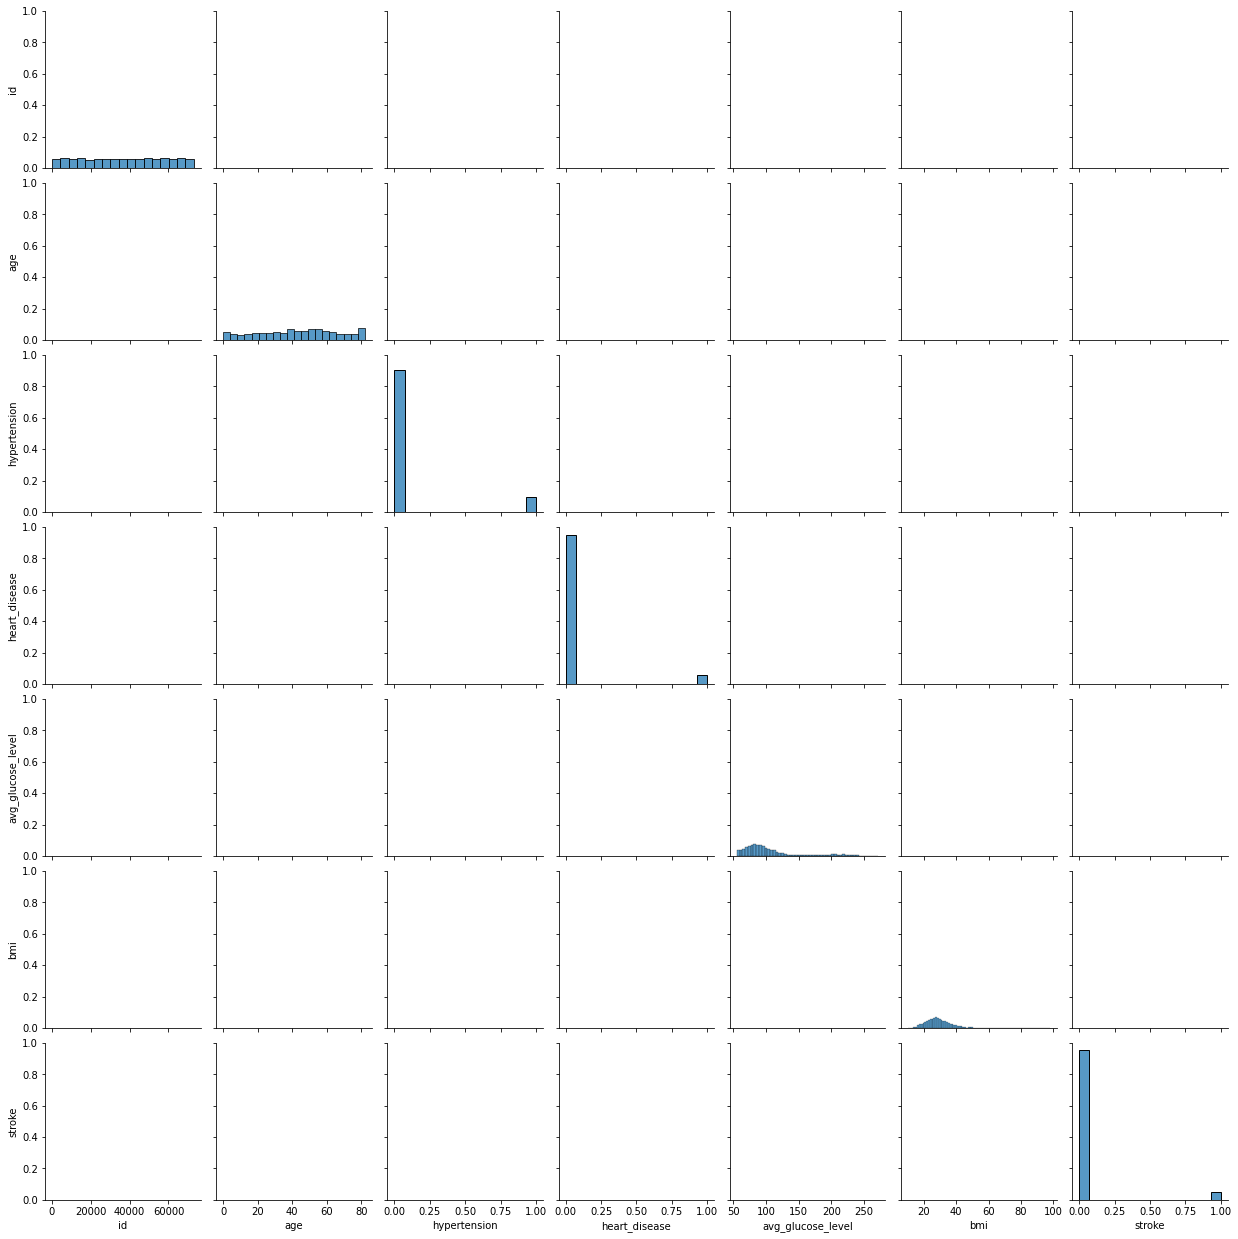

In [25]:
sns.pairplot(stroke_df, kind="gender")

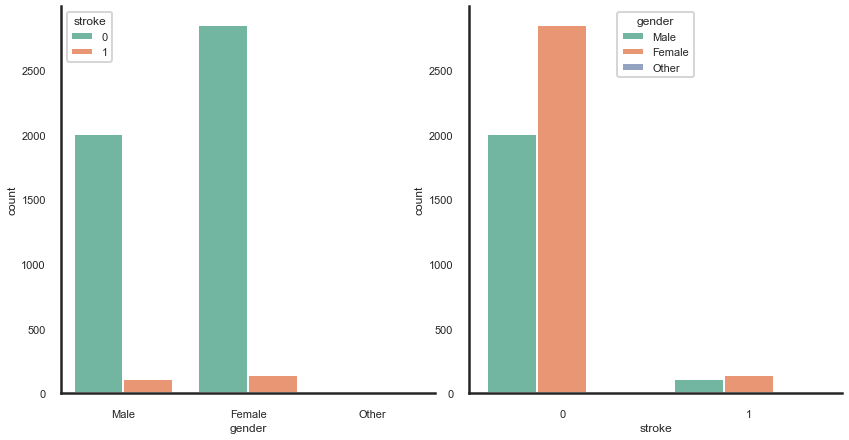

In [26]:
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='gender', hue='stroke', data=stroke_df, ax=gender_stroke, palette="Set2")
sns.despine()

gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=gender_stroke)
sns.countplot(x='stroke', hue='gender', data=stroke_df, ax=gender_stroke, palette="Set2")
sns.despine()

plt.show()

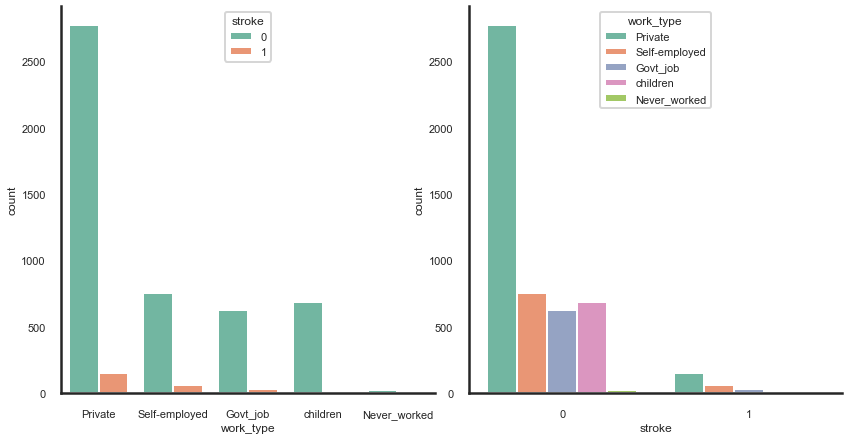

In [27]:
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)


ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='work_type', hue='stroke', data=stroke_df, ax=ax_gender_stroke, palette='Set2')
sns.despine()

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='work_type', data=stroke_df, ax=ax_gender_stroke, palette='Set2')
sns.despine()


plt.show()

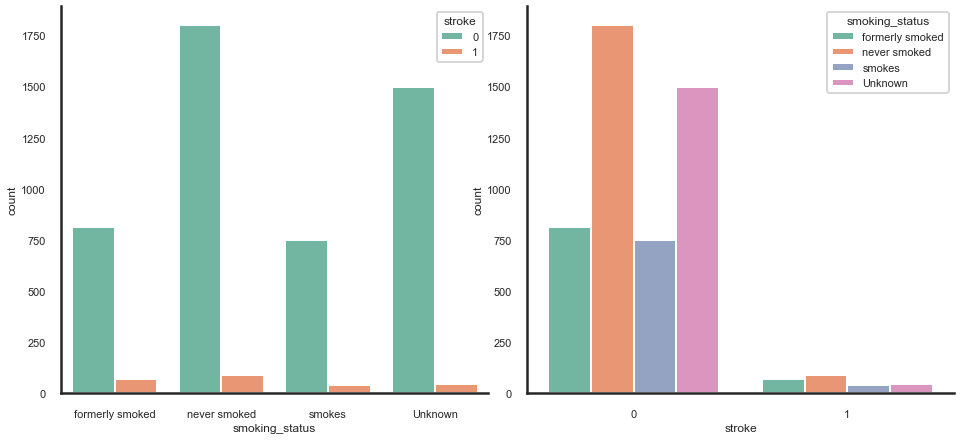

In [28]:
fig = plt.figure(figsize=(16,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)


ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='smoking_status', hue='stroke', data=stroke_df, ax=ax_gender_stroke, palette='Set2')
sns.despine()

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='smoking_status', data=stroke_df, ax=ax_gender_stroke, palette='Set2')
sns.despine()

plt.show()

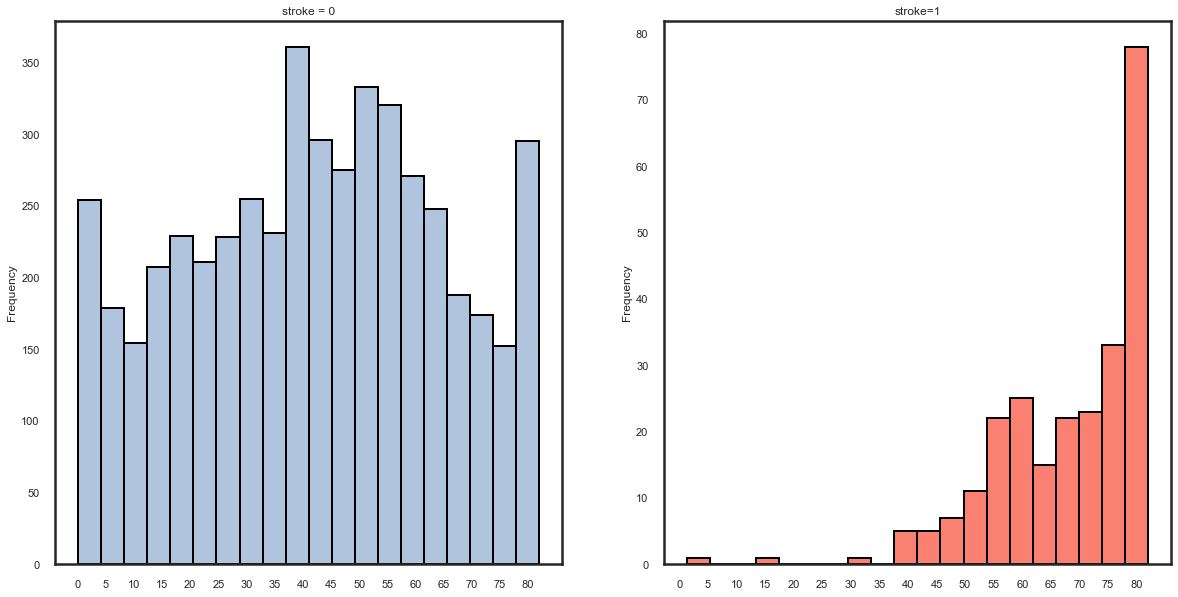

In [29]:
f,ax = plt.subplots(1,2, figsize=(20,10))

stroke_df.loc[stroke_df['stroke'] ==0]['age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='lightsteelblue')
ax[0].set_title('stroke = 0')
ax1 = list(range(0, 85, 5))
ax[0].set_xticks(ax1)

stroke_df[stroke_df['stroke']==1]['age'].plot.hist(ax=ax[1], color='salmon', bins=20, edgecolor='black')
ax[1].set_title('stroke=1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

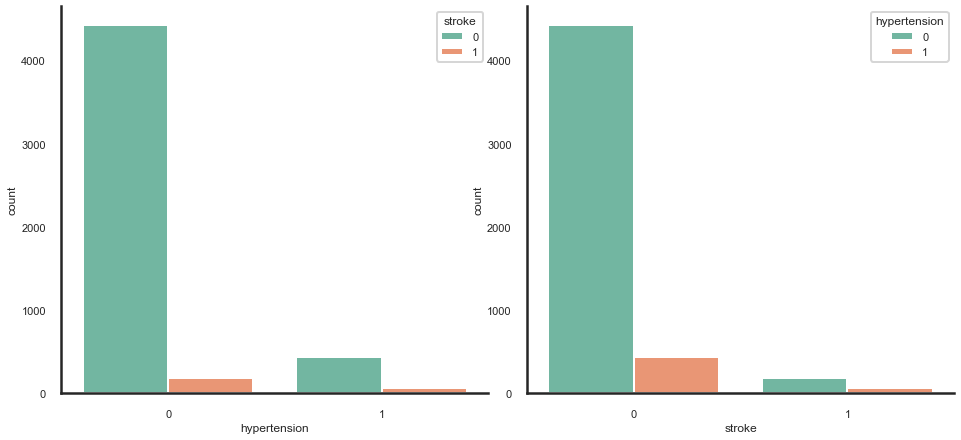

In [30]:
fig = plt.figure(figsize=(16,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)


ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='hypertension', hue='stroke', data=stroke_df, ax=ax_gender_stroke, palette='Set2')
sns.despine()

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='hypertension', data=stroke_df, ax=ax_gender_stroke, palette='Set2')
sns.despine()


plt.show()

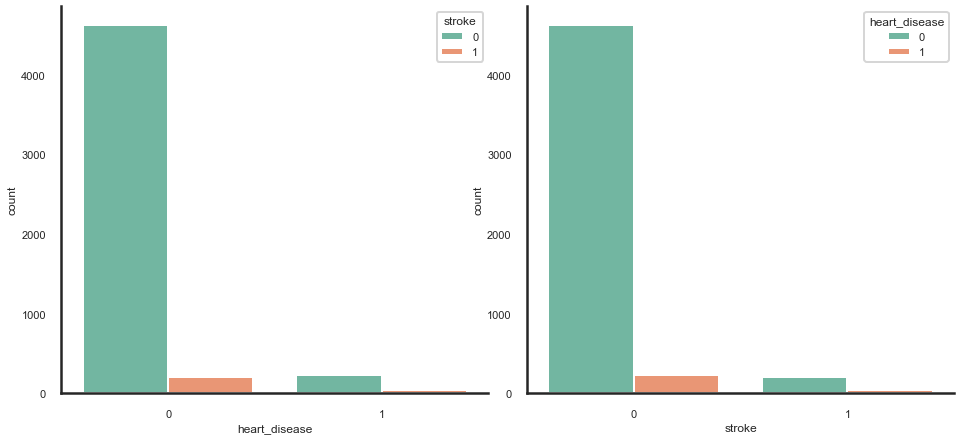

In [31]:
fig = plt.figure(figsize=(16,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='heart_disease', hue='stroke', data=stroke_df, ax=ax_gender_stroke, palette='Set2')
sns.despine()

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='heart_disease', data=stroke_df, ax=ax_gender_stroke, palette='Set2')
sns.despine()

plt.show()

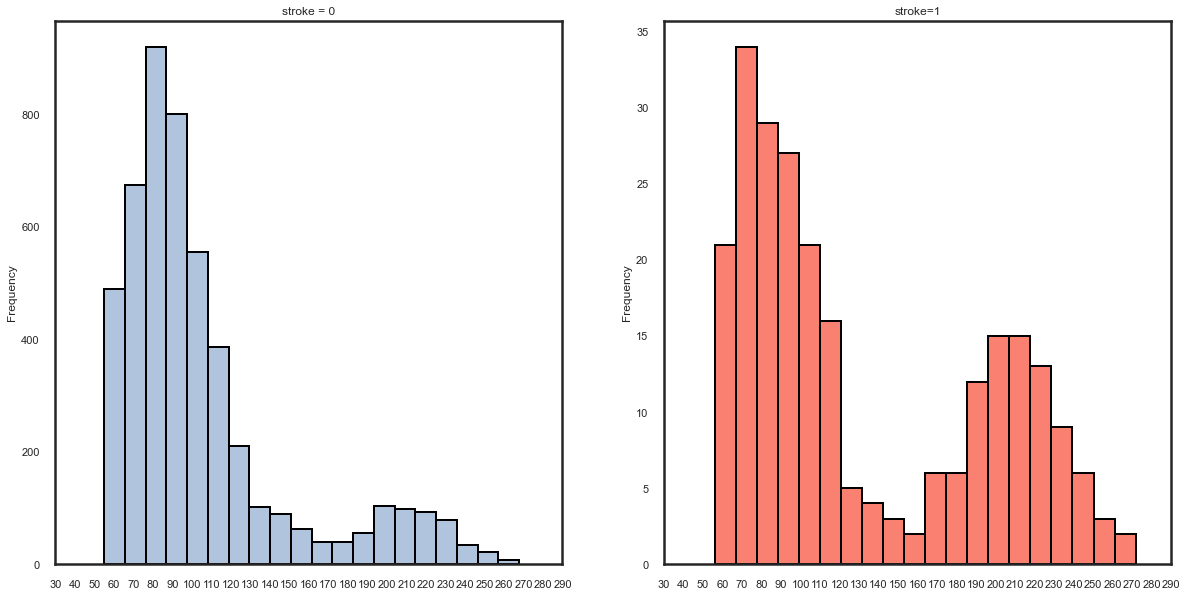

In [32]:
f,ax = plt.subplots(1,2, figsize=(20,10))

stroke_df.loc[stroke_df['stroke'] ==0]['avg_glucose_level'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='lightsteelblue')
ax[0].set_title('stroke = 0')
ax1 = list(range(30, 300, 10))
ax[0].set_xticks(ax1)

stroke_df.loc[stroke_df['stroke']==1]['avg_glucose_level'].plot.hist(ax=ax[1], color='salmon', bins=20, edgecolor='black')
ax[1].set_title('stroke=1')
x2= list(range(30, 300, 10))
ax[1].set_xticks(x2)
plt.show()

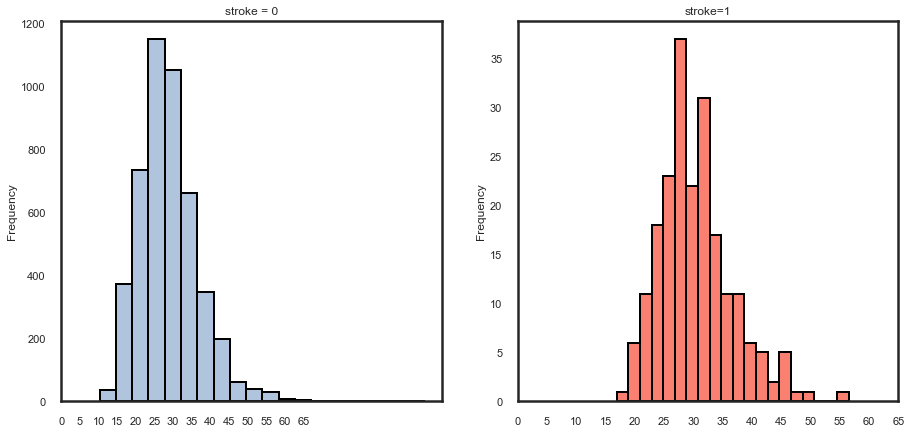

In [33]:
f,ax = plt.subplots(1,2, figsize=(15,7))

stroke_df.loc[stroke_df['stroke'] ==0]['bmi'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='lightsteelblue')
ax[0].set_title('stroke = 0')
ax1 = list(range(0, 70, 5))
ax[0].set_xticks(ax1)

stroke_df.loc[stroke_df['stroke']==1]['bmi'].plot.hist(ax=ax[1], color='salmon', bins=20, edgecolor='black')
ax[1].set_title('stroke=1')
x2= list(range(0, 70, 5))
ax[1].set_xticks(x2)
plt.show()

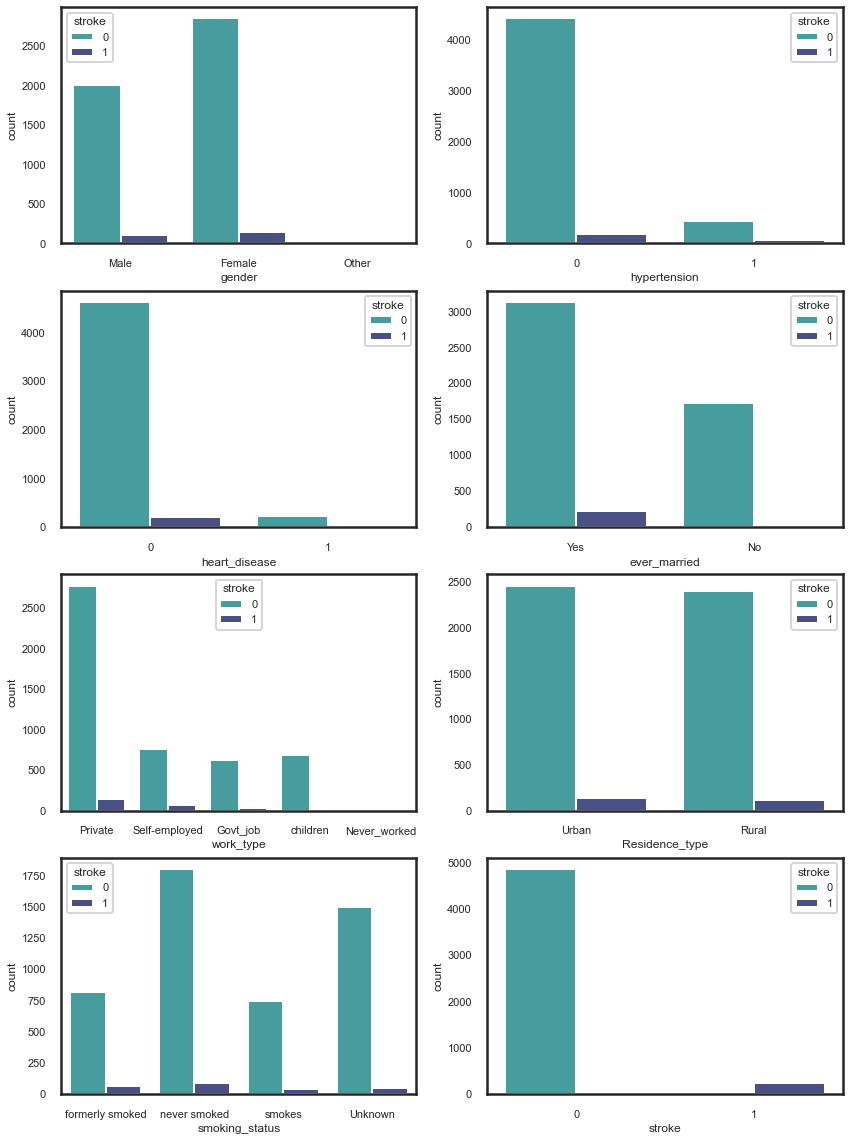

In [34]:
df_st=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']
fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()
for i, col_name in enumerate(df_st):
    sns.countplot(x=col_name, data=stroke_df, ax=axs[i], hue =stroke_df['stroke'],palette='mako_r')

<AxesSubplot:title={'center':'Correlation map for variables'}>

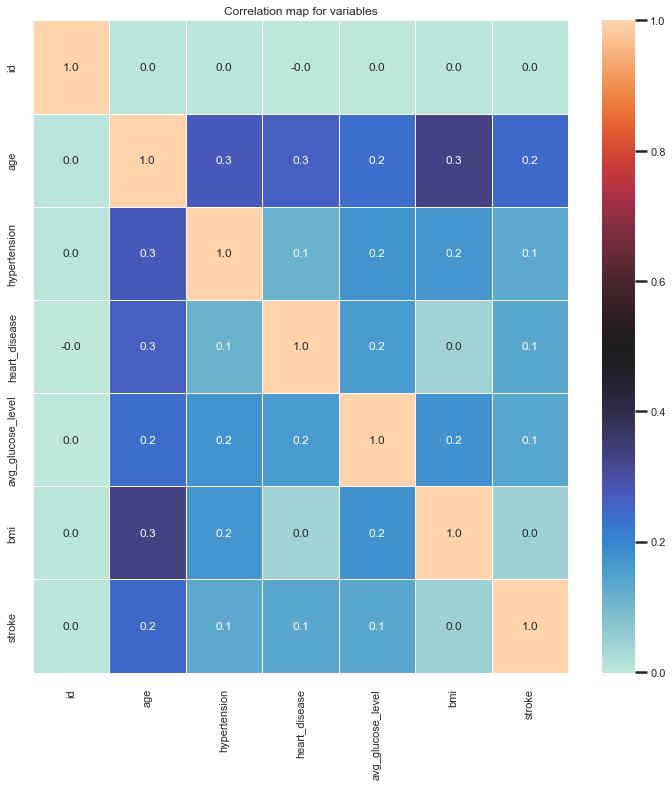

In [35]:
#correlation map for features
f,ax = plt.subplots(figsize=(12, 12))
ax.set_title('Correlation map for variables')
sns.heatmap(stroke_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="icefire")

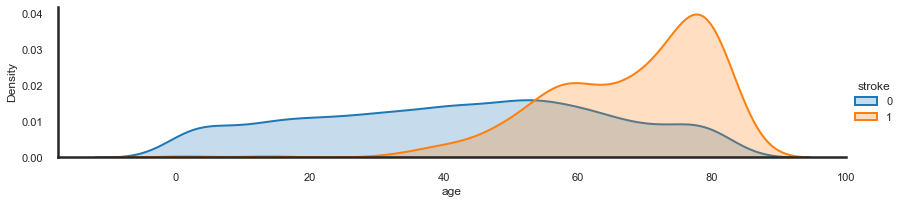

In [37]:
#Visualise the spread of the mean for the age variable
fig = sns.FacetGrid(data=stroke_df, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "age", shade=True)
fig.add_legend()
plt.savefig('stroke_age.png')


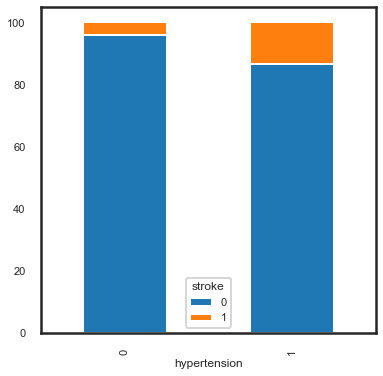

In [38]:
#Visualise proportion of people having hypertension between the 2 groups
df_hypertension = stroke_df.groupby(['hypertension','stroke'])['hypertension'].count()
df_hypertension_total = stroke_df.groupby(['hypertension'])['hypertension'].count()
df_hypertension_fig = df_hypertension / df_hypertension_total * 100
df_hypertension_fig = df_hypertension_fig.unstack()
df_hypertension_fig.plot.bar(stacked=True, figsize=(6,6), width=0.5)
plt.savefig('stroke_hypertension.png')

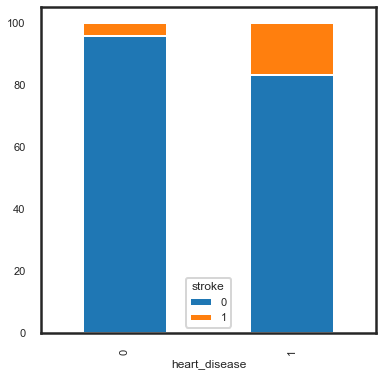

In [39]:
#Visualise proportion of people having heart disease between the 2 groups
df_heart = stroke_df.groupby(['heart_disease','stroke'])['heart_disease'].count()
df_heart_total = stroke_df.groupby(['heart_disease'])['heart_disease'].count()
df_heart_fig = df_heart / df_heart_total * 100
df_heart_fig = df_heart_fig.unstack()
df_heart_fig.plot.bar(stacked=True, figsize=(6,6), width=0.5)
plt.savefig('stroke_heart.png')

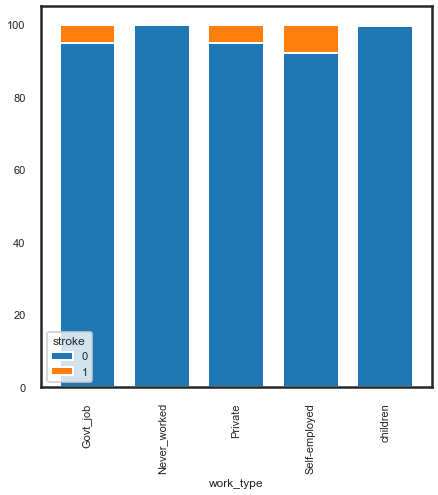

In [40]:
df_work = stroke_df.groupby(['work_type','stroke'])['work_type'].count()
df_work_total = stroke_df.groupby(['work_type'])['work_type'].count()
df_work_fig = df_work / df_work_total * 100
df_work_fig = df_work_fig.unstack()
df_work_fig.plot.bar(stacked=True, figsize=(7,7), width=0.75)
plt.savefig('stroke_work.png')

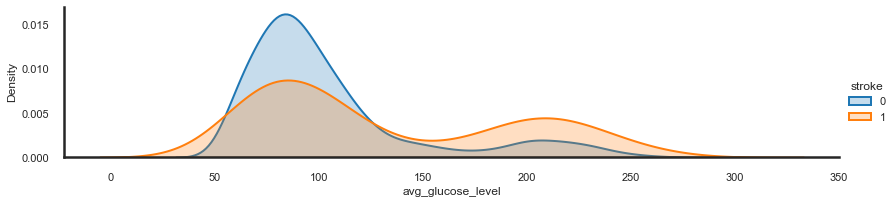

In [41]:
#spread avg_glucose_level
fig = sns.FacetGrid(data=stroke_df, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "avg_glucose_level", shade=True)
fig.add_legend()

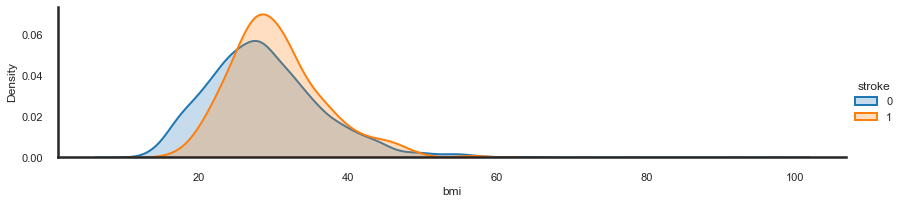

In [42]:
#spread bmi
fig = sns.FacetGrid(data= stroke_df, hue="stroke", aspect=4)
fig.map(sns.kdeplot, "bmi", shade=True)
fig.add_legend()
plt.savefig('stroke_bmi.png')

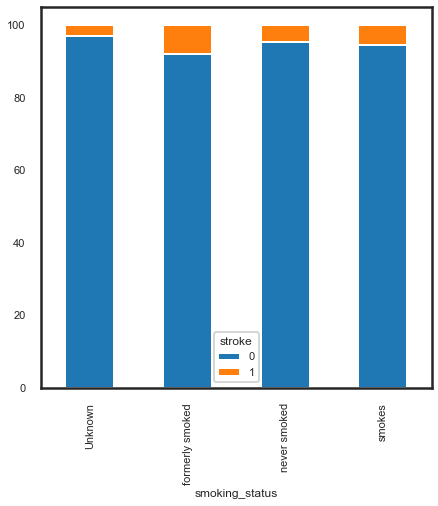

In [43]:
df_smoking = stroke_df.groupby(['smoking_status','stroke'])['smoking_status'].count()
df_smoking_total = stroke_df.groupby(['smoking_status'])['smoking_status'].count()
df_smoking_fig = df_smoking / df_smoking_total * 100
df_smoking_fig = df_smoking_fig.unstack()
df_smoking_fig.plot.bar(stacked=True, figsize=(7,7), width=0.5)
plt.savefig('stroke_smoking.png')